In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('../res/train.csv')


kmkg = df['Mileage'].str.endswith("km/kg").sum()
kmpl = df['Mileage'].str.endswith("kmpl").sum()
print('The number of rows with Km/Kg:', kmkg)
print('The number of rows with Kmpl:', kmpl)

The number of rows with Km/Kg: 66
The number of rows with Kmpl: 5951


In [7]:
from res.csv_cleaner import clean_mileage_engine_power_

clean_mileage_engine_power_(df)
df = df.drop(columns= ['Name', 'New_Price'])
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Mumbai,2010,72000,CNG,Manual,First,37.24,998.0,58.16,5.0,1.75
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


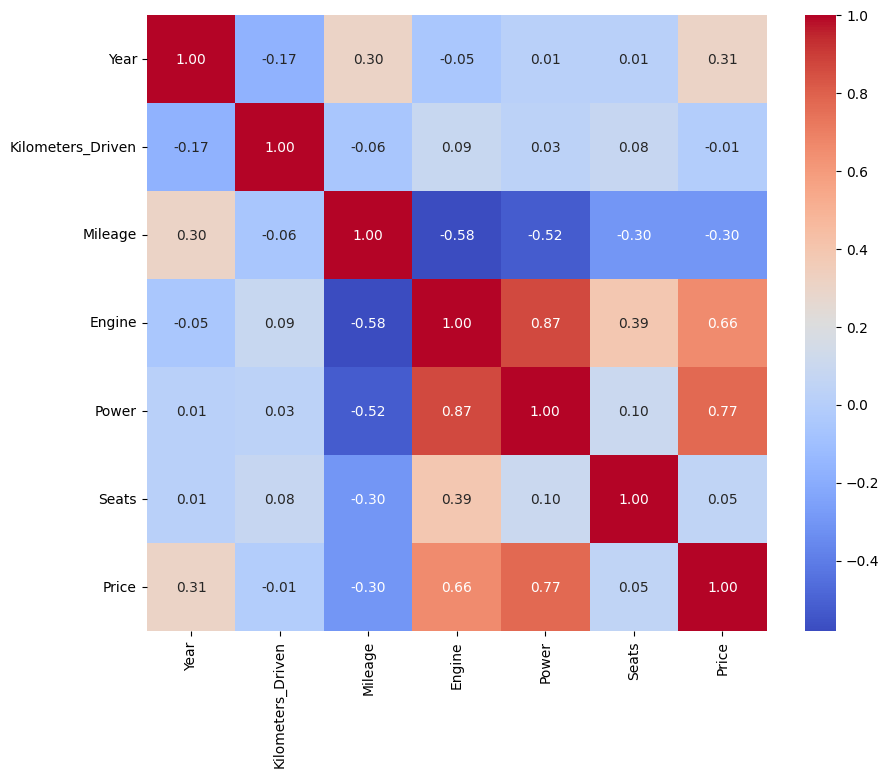

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

columns_of_interest = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']
df_selected = df[columns_of_interest]


#Calculer la matrice de corrélation
correlation_matrix = df_selected.corr()

# Visualiser la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()


In [3]:
from sklearn.model_selection import train_test_split

X = df.drop('Price', axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import ElasticNet
from pipeline import pipeline_create

estimator = ElasticNet(random_state=0)

pipeline = pipeline_create(df, X_train, estimator)

pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Year', 'Kilometers_Driven',
                                                   'Mileage', 'Engine', 'Power',
                                                   'Seats']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Location', 'Fuel_Type',
                                                   'Transmission',
                                                   'Owner_Type'])])),
                ('elasticnet', ElasticNet(random_state=0))])

In [5]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y_pred = pipeline.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print('MSE :', mae)

rmse = mse ** 0.5
print('RMSE :', rmse)

# Calcul de R²
r2 = r2_score(y_test, y_pred)
print(f"R²: {r2}")

MSE : 3.800366224969064
RMSE : 7.902103536309142
R²: 0.49257680705584417


In [14]:
from sklearn.model_selection import GridSearchCV

# Définir la grille de recherche
param_grid = {
    'regressor__alpha': [0.1, 1.0, 10.0],
    'regressor__l1_ratio': [0.1, 0.5, 0.9]
}

# Initialiser la recherche sur grille avec validation croisée
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')

# Exécuter la recherche sur grille
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres
print("Meilleurs paramètres: ", grid_search.best_params_)

# Utiliser le meilleur modèle pour prédire les données de test
y_pred = grid_search.predict(X_test)

# Calculer et afficher de nouvelles métriques
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)
print(f'MAE : {mae},\nMSE : {mse},\nRMSE : {rmse},\nR²: {r2}')

ValueError: Invalid parameter 'regressor' for estimator Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Year', 'Kilometers_Driven',
                                                   'Mileage', 'Engine', 'Power',
                                                   'Seats']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Location', 'Fuel_Type',
                                                   'Transmission',
                                                   'Owner_Type'])])),
                ('elasticnet', ElasticNet(random_state=0))]). Valid parameters are: ['memory', 'steps', 'verbose'].